In [28]:
import tensorflow as tf
from music21 import converter, instrument, note , chord, stream
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random

In [29]:
from keras import utils as np_utils

In [30]:
os.chdir("C:/Users/tanma/Downloads/MIDI")

In [31]:
filename = random.sample(os.listdir("C:/Users/tanma/Downloads/MIDI"),5)

In [32]:
music_list = os.listdir("C:/Users/tanma/Downloads/MIDI")

In [33]:
musical_note = []
offset = []
instrumentlist = []

In [34]:
for file in filename:
    matching = [s for s in music_list if file.split('_')[0] in s]
    print(matching)
    r1 = matching[random.randint(0,len(matching)-1)]
    string_midi = converter.parse(r1)
    parsednotes  = None
    parts = instrument.partitionByInstrument(string_midi)
    instrumentlist.append(parts.parts[0].getInstrument().instrumentName)
    if parts:
        parsednotes = parts.parts[0].recurse()
    else:
        parsednotes = string_midi.flat.notes
    for element in parsednotes:
        offset.append(element.offset)
        if isinstance(element,note.Note):
            musical_note.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
            musical_note.append('.'.join(str(n) for n in element.normalOrder))

['sw72dvc.mid']
['Giuliani_2eme_Pot-pourri_Guitare_Op28.mid', 'Giuliani_Air_des_mysteres_Isis.mid', 'Giuliani_Allegretto_Am.mid', 'Giuliani_Allegretto_C.mid', 'Giuliani_Allegretto_G.mid', 'Giuliani_Allegretto_in_F.mid', 'Giuliani_Andante_D.mid', 'Giuliani_Andantino_in_A.mid', 'Giuliani_Arietta_Op95_No3.mid', 'Giuliani_Avventure_Amore_Op116.mid', 'Giuliani_Baccanali_Roma_Op102.mid', 'Giuliani_Concerto_No1_Op30_Allegro_Maestoso.mid', 'Giuliani_Concerto_No1_Op30_Polonaise_B.mid', 'Giuliani_Concerto_No1_Op30_Siciliana.mid', 'Giuliani_Concerto_No2_Op36_Andantino.mid', 'Giuliani_Concerto_No2_Op36_Maestoso.mid', 'Giuliani_Concerto_No2_Op36_Rondo_allegretto.mid', 'Giuliani_Concerto_No3_Op70_Allegro_maestoso.mid', 'Giuliani_Concerto_No3_Op70_Andantino_alla_Siciliana.mid', 'Giuliani_Concerto_No3_Op70_Polonaise.mid', 'Giuliani_Concerto_Op30_No1_Alla_Pollaca.mid', 'Giuliani_Concerto_Op30_No1_AllegroMaestoso.mid', 'Giuliani_Concerto_Op30_No1_Andantino_Siciliano.mid', 'Giuliani_De_Calma_Oh_Ciel_Op10

C:\Users\tanma\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=3, channel=None, data=b'Drums(\xb6\xc5\xd3\xc9)                    '>; getting generic Instrument
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Drums(\xb6\xdc\xd3\xc9)                    '>; getting generic Instrument
  warnings.warn(


['Alog - Zany & Brennan Heart - Bang The Bass (Made by DJ A.mid', 'Brennan Heart & Wildstylez - Lose My Mind.mid', 'Brennan Heart - City Of Intensity.mid', 'Brennan Heart - Do It My Way.mid', 'Brennan Heart - Get Wasted.mid', 'Brennan Heart - Hardbass (Hardbass 2009 DJ Tool).mid', 'Brennan Heart - Home (Blademasterz RMX).mid', 'Brennan Heart - LSD (Love. Sadness & Desire).mid', 'Brennan Heart - Memento.mid', 'Brennan Heart - Revelations (Reverze 2010 Anthem).mid', 'Brennan Heart - TBA (Face the Enemy v2.0).mid', 'Brennan Heart - The Secret of Blade.mid', 'Brennan Heart - Till U Believe It.mid', 'Brennan Heart - Till U Believe.mid', 'Brennan Heart - Van Halen Is A Rockstar.mid', 'Brennan Heart - Watch Me Grow.mid', 'Brennan Heart - We Come and We Go (Original Mix).mid', 'Brennan Heart - We Come And We Go.mid', 'Brennan Heart AKA Blademasterz - One Blade.mid', 'BrennanHeartALusion_-_DontSpeak__DjultraSONIK_20120518151858.mid', 'BrennanHeartvsWildstylez_-_LoseMyMind__frozensunrise_2013012

In [58]:
dict1 = {"Harmony_Search":["Forest(3).mid","68%"],"PSO":["Forest(3).mid","53%"],"Genetic_Algorithm":["Forest(3)","65%"]}

In [36]:
pd.Series(instrumentlist).value_counts()

Piano              2
Piano (hi)         1
Acoustic Guitar    1
dtype: int64

In [37]:
pd.Series(musical_note).value_counts()

F#2         2092
G3            16
D3            15
C4            14
7             13
C#3           12
3.7           12
G4            11
7.10          10
E3             9
F4             7
D4             7
C3             7
E4             6
0.4            6
F3             6
G2             6
B-3            6
C2             5
B3             5
B2             5
A3             5
3.5.8          4
B-2            4
2              4
E-2            4
10.0.2.5       4
8.0.3          3
11.2           3
0.3.7          2
5.10           2
1.2            2
E-3            2
2.3            2
10.0.2         2
0.4.7          2
0              2
A2             2
7.11.2         1
F2             1
6.9            1
7.0            1
9.0            1
4.10           1
0.2            1
2.5            1
5.11           1
5.9            1
dtype: int64

In [38]:
sequence_length = 100
pitchcategory = sorted((set(item for item in musical_note)))
note_encoding = dict((note,number) for number, note in enumerate(pitchcategory))
model_input_original = []
model_output = []
for i in range(0,len(musical_note) - sequence_length, 1):
    sequence_in = musical_note[i:i+sequence_length]
    sequence_out = musical_note[i+sequence_length]
    model_input_original.append([note_encoding[char] for char in sequence_in])
    model_output.append(note_encoding[sequence_out])
n_patterns = len(model_input_original)
model_input = np.reshape(model_input_original,(n_patterns,sequence_length,1))
model_output = np_utils.to_categorical(model_output)
Len_Notes = model_output.shape[1]
model_input = model_input/float(Len_Notes)
print(model_input.shape)

(2229, 100, 1)


In [39]:
gru_model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(16,input_shape = (model_input.shape[1],model_input.shape[2]),return_sequences = True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.GRU(64,return_sequences = True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(Len_Notes, activation = 'softmax'),
])

In [40]:
gru_model.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop')

In [41]:
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 16)           912       
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
 gru_1 (GRU)                 (None, 100, 64)           15744     
                                                                 
 dropout_1 (Dropout)         (None, 100, 64)           0         
                                                                 
 gru_2 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1

In [42]:
int_to_note = dict((number,note) for number, note in enumerate(pitchcategory))
pattern  = model_input_original[0]
prediction_output = []

In [43]:
gru_model.fit(model_input,model_output,epochs = 30,batch_size = 64)

Epoch 1/30
35/35 [==============================] - 11s 86ms/step - loss: 1.0929
Epoch 2/30
35/35 [==============================] - 3s 83ms/step - loss: 0.5175
Epoch 3/30
35/35 [==============================] - 3s 92ms/step - loss: 0.4095
Epoch 4/30
35/35 [==============================] - 3s 90ms/step - loss: 0.3572
Epoch 5/30
35/35 [==============================] - 3s 86ms/step - loss: 0.3507
Epoch 6/30
35/35 [==============================] - 3s 82ms/step - loss: 0.3429
Epoch 7/30
35/35 [==============================] - 3s 80ms/step - loss: 0.3259
Epoch 8/30
35/35 [==============================] - 3s 82ms/step - loss: 0.3184
Epoch 9/30
35/35 [==============================] - 3s 85ms/step - loss: 0.3254
Epoch 10/30
35/35 [==============================] - 3s 83ms/step - loss: 0.3108
Epoch 11/30
35/35 [==============================] - 3s 83ms/step - loss: 0.3148
Epoch 12/30
35/35 [==============================] - 3s 91ms/step - loss: 0.3125
Epoch 13/30
35/35 [=================

In [44]:
for note_index in range(500):
    prediction_input = np.reshape(pattern,(1,len(pattern),1))
    prediction_input = prediction_input/float(Len_Notes)
    prediction_mod = gru_model.predict(prediction_input,verbose = 0)
    index = np.argmax(prediction_mod)
    result = int_to_note[index]
    prediction_output.append(result)
    pattern = np.append(pattern,index)
    pattern = pattern[1:len(pattern)]

In [45]:
offlen = len(offset)
DifferentialOffset = (max(offset)-min(offset))/len(offset)
offset2 = offset.copy()
output_notes = []
i = 0
offset = []
initial = 0
for i in range(len(offset2)):
    offset.append(initial)
    initial = initial+DifferentialOffset
i = 0
for pattern in prediction_output:
    if('.' in pattern) or pattern.isdigit():
        notes_in_chord = pattern.split('.')
        notes = []
        for check_note in notes_in_chord:
            gen_note = note.Note(int(check_note))
            gen_note.storedInstrument = instrument.Piano()
            notes.append(gen_note)
        gen_chord = chord.Chord(notes)
        gen_chord.offset = offset[i]
        output_notes.append(gen_chord)
    elif ('.' not in pattern) or pattern.isdigit:
        gen_note = note.Note(pattern)
        gen_note.offset = offset[i]
        gen_note.storedInstrument = instrument.Guitar()
        output_notes.append(gen_note)
    else:
        gen_note = note.Note(pattern)
        gen_note.offset = offset[i]
        gen_note.storedInstrument = instrument.Flute()
        output_notes.append(gen_note)
    i = i+1

In [46]:
midi_stream = stream.Stream(output_notes)
midi_stream.write('midi', fp = 'GRU_output.mid')
os.chdir(r"C:\Users\tanma\Downloads\MIDI_OUTPUT")

In [47]:
midi_stream.write('midi',fp = 'GRU_output.mid')

'GRU_output.mid'

In [48]:
class HarmonyCore(object):
    
    def __init__(self,harmony_obj):
        self.obj_func = harmony_obj
        self.hmm_matrix = list()
        matrix = []
        for limit in self.obj_func.up_down_limit:
            row = np.random.uniform(low=limit[0], high=limit[1], size=(1,self.obj_func.harmony_menmory_size))[0] 
            matrix.append(row)
        matrix = np.asarray(matrix).transpose().round(self.obj_func.weight_decimal)
        print(matrix)
        self.hmm_matrix = matrix
        
    def run(self):
        hmm_err_list = [0] * len(self.hmm_matrix)
        for m_i in range(len(self.hmm_matrix)):
            vector_list = self.hmm_matrix[m_i]

            error = self.obj_func.fitness(vector_list,self.obj_func.input_X,self.obj_func.input_Y)
            hmm_err_list[m_i] = error
            
        for itera in range(self.obj_func.iteration):
            vector_list = [0] * self.obj_func.vector_size
            #while True:
            for i in range(self.obj_func.vector_size):
                if np.random.rand(1,)[0] < self.obj_func.hmcr_proba:
                    #new_vactor = 0.0
                    new_vactor = self.hmm_matrix[np.random.randint(self.obj_func.harmony_menmory_size, size=1)[0]][i]
                    if np.random.rand(1,)[0] < self.obj_func.par_proba:
                        if np.random.rand(1,)[0] < self.obj_func.adju_proba:
                            #new_vactor -= np.std(self.hmm_matrix[:][i]) * np.random.rand(1,)[0]
                            new_vactor -= (new_vactor - self.obj_func.up_down_limit[i][0]) * np.random.rand(1,)[0]
                        else:
                            #new_vactor += np.std(self.hmm_matrix[:][i]) * np.random.rand(1,)[0]
                            new_vactor += (self.obj_func.up_down_limit[i][0] - new_vactor) * np.random.rand(1,)[0]
                    vector_list[i] = round(new_vactor, self.obj_func.weight_decimal)
                else: 
                    new_vactor = np.random.uniform(low=self.obj_func.up_down_limit[i][0], high=self.obj_func.up_down_limit[i][1], size=(1,))[0]
                    vector_list[i] = round(new_vactor, self.obj_func.weight_decimal)
                '''
                if not vetor_list in self.hmm_matrix:
                    break
                '''
            if self.obj_func.sample_size > 0:
                random_idx = np.random.permutation(len(self.obj_func.input_X))[:self.obj_func.sample_size]
            else:
                random_idx = np.random.permutation(len(self.obj_func.input_X))
            error = self.obj_func.fitness(vector_list,[self.obj_func.input_X[i] for i in random_idx],[self.obj_func.input_Y[i] for i in random_idx])
            overwrite_index = hmm_err_list.index(max(hmm_err_list))
            if hmm_err_list[overwrite_index] >= error:
                assert([round(i, self.obj_func.weight_decimal) for i in vector_list] == vector_list)
                vector_list = [round(i, self.obj_func.weight_decimal) for i in vector_list]
                if not vector_list in self.hmm_matrix.tolist():
                    #print('HMM_UPDATEP_NEW_VECTOR:',vetor_list)
                    #print('HMCR:',self.obj_func.hmcr_proba,'PAR:',self.obj_func.par_proba,'HMM_UPDATE_NEW_ERROR:',error)
                    hmm_err_list[overwrite_index] = error
                    self.hmm_matrix[overwrite_index] = vector_list
            #else:
            #    print(vetor_list,'worst than',self.hmm_matrix[overwrite_index],'because new error:',error,'higher than',hmm_err_list[overwrite_index])
        return self.hmm_matrix,hmm_err_list,hmm_err_list.index(min(hmm_err_list))    

In [51]:
W = 0.5
c1 = 0.8
c2 = 0.9 

n_iterations = 100
target_error = 2.57
n_particles = 40

class Particle():
    def __init__(self):
        self.position = np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50])
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0])

    def __str__(self):
        print("I am at ", self.position, " meu pbest is ", self.pbest_position)
    
    def move(self):
        self.position = self.position + self.velocity


class Space():

    def __init__(self, target, target_error, n_particles):
        self.target = target
        self.target_error = target_error
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([random.random()*50, random.random()*50])

    def print_particles(self):
        for particle in self.particles:
            particle.__str__()
   
    def fitness(self, particle):
        return particle.position[0] ** 2 + particle.position[1] ** 2 + 1

    def set_pbest(self):
        for particle in self.particles:
            fitness_cadidate = self.fitness(particle)
            if(particle.pbest_value > fitness_cadidate):
                particle.pbest_value = fitness_cadidate
                particle.pbest_position = particle.position
            

    def set_gbest(self):
        for particle in self.particles:
            best_fitness_cadidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_cadidate):
                self.gbest_value = best_fitness_cadidate
                self.gbest_position = particle.position

    def move_particles(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*random.random()) * (particle.pbest_position - particle.position) + \
                            (random.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = new_velocity
            particle.move()
            

search_space = Space(1, target_error, n_particles)
particles_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particles_vector
search_space.print_particles()

iteration = 0
while(iteration < n_iterations):
    search_space.set_pbest()    
    search_space.set_gbest()

    if(abs(search_space.gbest_value - search_space.target) <= search_space.target_error):
        break

    search_space.move_particles()
    iteration += 1
    
print("The best solution is: ", search_space.gbest_position, " in n_iterations: ", iteration)

I am at  [ 35.96930387 -42.35292866]  meu pbest is  [ 35.96930387 -42.35292866]
I am at  [-35.31687117  36.97296799]  meu pbest is  [-35.31687117  36.97296799]
I am at  [-46.58761364   6.84410567]  meu pbest is  [-46.58761364   6.84410567]
I am at  [13.21632048  0.92191089]  meu pbest is  [13.21632048  0.92191089]
I am at  [17.40122133 19.76360689]  meu pbest is  [17.40122133 19.76360689]
I am at  [-28.71474189   3.17320807]  meu pbest is  [-28.71474189   3.17320807]
I am at  [-16.85443383  -5.56791331]  meu pbest is  [-16.85443383  -5.56791331]
I am at  [-40.43534952   0.18040092]  meu pbest is  [-40.43534952   0.18040092]
I am at  [36.03951112 24.68890935]  meu pbest is  [36.03951112 24.68890935]
I am at  [-36.8270693   18.15938366]  meu pbest is  [-36.8270693   18.15938366]
I am at  [-10.28420855  43.25659069]  meu pbest is  [-10.28420855  43.25659069]
I am at  [18.54178012 20.47807782]  meu pbest is  [18.54178012 20.47807782]
I am at  [ 25.73849807 -23.45510559]  meu pbest is  [ 25

In [52]:
import matplotlib.pyplot as plt

In [53]:

class World:
    cell_dict = {}

class Cell:
    """
    Organism, that has a DNA.
    """
    number = 0
    def __init__(self, dna=None, n_chromosomes = 6, n_genes = 1, dict_entry=True):
        if dict_entry:
            self.number = Cell.number
            Cell.number += 1

        self.mutation_chance = 0.1
        self.n_mutations = 1

        if dna is not None:
            self.dna = dna
        else:
            self.dna = self._random_dna(n_chromosomes, n_genes)

        if dict_entry:
            World.cell_dict[self.number] = self

    def _random_dna(self, n_chromosomes=4, n_genes=2):
        """
        Generates a random DNA for Cell.
        :param n_chromosomes: Number of chromosomes.
        :param n_genes: Number of genes inside 1 Chromosome.
        :return: random DNA; example: [[0.1,0.3],[0.3,0.7],[0.9,0.1],[0.2,0.6]]
        """
        dna = [[] for _ in range(n_chromosomes)]
        for _ in range(n_genes):
            for n in range(len(dna)):
                dna[n].append(random.random())
        return dna

    def mate(self, partner, dict_entry=True):
        """
        Produces a new Cell individual with partner.
        :param partner: type Cell, partner with which to produce child.
        :return: DNA of the produced child. (type list)
        """
        dna1 = self.dna
        dna2 = partner.dna

        # --- Crossover
        child_dna = []
        for n in range(len(dna1)):
            parent_chromosome = random.randint(0, 1)
            if parent_chromosome == 0:
                child_dna.append(dna1[n])
            elif parent_chromosome == 1:
                child_dna.append(dna2[n])

        # --- Mutation
        if random.random() < self.mutation_chance:
            mutation_idx1 = []
            mutation_idx2 = []
            for _ in range(self.n_mutations):
                mutation_idx1.append(random.randint(0, len(child_dna) - 1))
                mutation_idx2.append(random.randint(0, len(child_dna[0]) - 1))
            mutated_dna = []
            for y, chrom in enumerate(child_dna):
                mutated_dna.append([])
                for x, gene in enumerate(chrom):
                    for id, idx in enumerate(mutation_idx1):
                        ok = True
                        if y == idx and x == mutation_idx2[id]:
                            mutated_dna[y].append(random.random())
                            ok = False
                            break
                    if ok:
                        mutated_dna[y].append(gene)
            child_dna = mutated_dna
        child_cell = Cell(dna=child_dna, dict_entry=dict_entry)
        return child_cell

    def _get_fitness(self):
        """
        Calculates the fitness of this cell.
        :return: Fitness
        """
        single_dim = [j for sub in self.dna for j in sub]
        normalized = self._mean_normalize(single_dim)
        return sum(normalized)

    def _mean_normalize(self, data):
        """
        Applies mean normalization to a single dimension list of values.
        :param data: type list, filled with values
        :return: returns list with all values normalized (0-1)
        """
        newdata = []
        for d in data:
            norm = 1 / (max(data) - min(data)) * (d - max(data)) + 1 #(max'-min') / (max - min) * (value - max) + max'
            newdata.append(norm)
        return newdata

    def get_similarity(self, other_cell):
        """
        Function to calculate similarity of DNAs.
        :param other_cell: type Cell, to compare DNAs with.
        :return: Similarity of the two cells in percent.
        """
        dna1 = self.dna
        dna2 = other_cell.dna
        max_similarity = len([j for sub in dna1 for j in sub])
        n_similar = 0
        for num, chromosome1 in enumerate([j for sub in dna1 for j in sub]):
            chromosome2 = [j for sub in dna2 for j in sub][num]
            if chromosome1 == chromosome2:
                n_similar += 1
        if n_similar == 0:
            return 0
        similarity = n_similar / max_similarity
        return similarity

    def _repr_(self):
        return str(self.dna)

class Population:
    """
    Main class for controlling the genetic algorithm.
    """
    def __init__(self, n_population=50, n_generations=100):
        self.n_population = n_population
        self.n_generations = n_generations

        self.population = []
        self.fitness_plot = []

    def selection(self, n_selected):
        """
        Uses a selection process to select the next n_selected parents for further breeding.
        :return: The selected Cells. type list. selection(2) returns [Cell, Cell]
        """
        selection = []

        fitness_list = [(c.number, c._get_fitness()) for c in self.population]
        sorted_values = sorted(fitness_list, key=lambda x: x[1], reverse=True)
        for n in range(n_selected):
            selection.append(World.cell_dict[sorted_values[n][0]])

        return selection

    def advanced_selection(self, n_selected):
        """
        Uses a advanced selection process to select the parents with the best outcome for the next generation.
        :param n_selected: Placeholder if someone used old function with same parameters.
        :return: The selected Cells. type list.
        """
        selection = []
        n_preselected = random.randint(2,10)
        fitness_list = [(c.number, c._get_fitness()) for c in self.population]
        sorted_values = sorted(fitness_list, key=lambda x: x[1], reverse=True)
        preselected = [y[0] for y in sorted_values[:n_preselected]]
        combinations = {}
        for p1 in preselected:
            p1_cell = World.cell_dict[p1]
            for p2 in preselected:
                p2_cell = World.cell_dict[p2]
                child = p1_cell.mate(p2_cell, dict_entry=False)
                combinations[f"{p1}-{p2}"] = child._get_fitness()
        sorted_values = sorted(combinations.items(), key=lambda x: x[1], reverse=True)
        best = sorted_values[0][0].split("-")
        selection.append(World.cell_dict[int(best[0])])
        selection.append(World.cell_dict[int(best[1])])
        return selection


    def next_generation(self):
        """
        Breeds next generation.
        :return: This generation's population, The fitness plot up to this point
        """
        selection = self.advanced_selection(n_selected=2)

        self.population = []
        for pop_idx in range(self.n_population):
            self.population.append(selection[0].mate(selection[1]))

        # --- Statistics ---
        fitness_list = [c._get_fitness() for c in self.population]
        self.fitness_plot.append(sum(fitness_list) / len(fitness_list))

        return self.population, self.fitness_plot

    def plot_stats(self):
        """
        Plots the fitness over all generations using matplotlib.
        """
        plt.plot(self.fitness_plot)
        plt.title('Average Fitness')
        plt.ylabel('Fitness')
        plt.xlabel('Generations')
        plt.legend(['Fitness'], loc='lower right')
        plt.show()

    def run(self):
        for _ in range(self.n_generations):
            self.next_generation()
        return self.population, self.fitness_plot

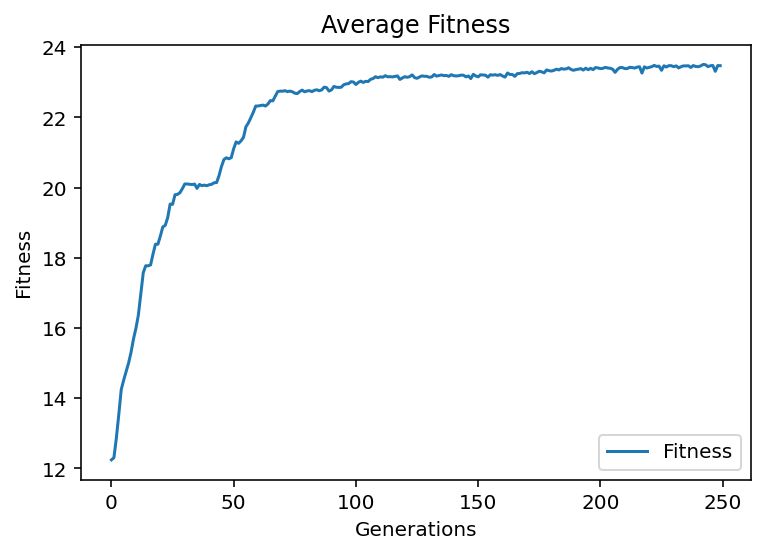

In [60]:
adam = Cell(n_chromosomes=5, n_genes=5)
eve = Cell(n_chromosomes=5, n_genes=5)

pop = Population(n_population=50, n_generations=250)
pop.population.append(adam)
pop.population.append(eve)

pop.run()
pop.plot_stats()

In [61]:
print(dict1)

{'Harmony_Search': ['Forest(3).mid', '68%'], 'PSO': ['Forest(3).mid', '53%'], 'Genetic_Algorithm': ['Forest(3)', '65%']}
